In [ ]:
from pathlib import Path
import pandas as pd
from janitor import xlsx_table
import numpy as np
import xlwings as xw

C:\Users\ckho\Desktop\Soft\Jupyter_Portable\JuypterPortable\apps\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#!pip install --user --upgrade xlwings

In [ ]:
#===========================================================================
path_consolid = r'L:\LU\Staff\Ricky\Pre-ITS\3. Consolidation'
path_toGdrive = r'L:\LU\Staff\Ricky\Pre-ITS\9. Result'

#==============================================================================list(df.columns)
df1 = pd.DataFrame(columns = ['INV_GID',
 'TREE_ID',
 'TREE_UID',
 'VEG_ID',
 'TAG_ID',
 'FEAT_TYPE',
 'ZONE_TYPE',
 'SPEC_TYPE',
 'DEFECT_TYPE',
 'OVT_ID',
 'TR_LEVEL',
 'ROOT_LEVEL',
 'HEIGHT',
 'SPREAD',
 'DBH',
 'RECORD_DT',
 'RECORD_BY',
 'MAINT_DIST',
 'ST_CODE',
 'SLOPE_NO',
 'HYD_NO',
 'CONT_NO',
 'I_VERSION',
 'DELETE',
 'PHOTO',
 'TIMESTAMP',
 'REMARK',
 'P_USER_ID',
 'SUB_DATE',
 'EASTING',
 'NORTHING'])

df1 = df1[0:0]

df2 = pd.DataFrame(columns = ['INV_GID',
 'TREE_ID',
 'TREE_UID',
 'VEG_ID',
 'TAG_ID',
 'FEAT_TYPE',
 'ZONE_TYPE',
 'SPEC_TYPE',
 'DEFECT_TYPE',
 'OVT_ID',
 'TR_LEVEL',
 'ROOT_LEVEL',
 'HEIGHT',
 'SPREAD',
 'DBH',
 'RECORD_DT',
 'RECORD_BY',
 'MAINT_DIST',
 'ST_CODE',
 'SLOPE_NO',
 'HYD_NO',
 'CONT_NO',
 'I_VERSION',
 'DELETE',
 'PHOTO',
 'TIMESTAMP',
 'REMARK',
 'P_USER_ID',
 'SUB_DATE',
 'EASTING',
 'NORTHING'])

df2 = df2[0:0]

#=============================================================================

dfspec = pd.read_csv(r'L:\LU\Staff\Ricky\Pre-ITS\0. HydSource\SPEC_TYPE_20220414.csv')

#============================================================================ Load Consoildation folder
path = Path(path_consolid)
pattern = r'**\Master*.xlsm'

for file in path.glob(pattern):

    ###======================================想不要含 _c 的話
    #if str('_c') not in str(file):
    if str(file.parent.absolute()).endswith('_c') == False:

        print(file)

        xltable = 'Combine8'
        wksheet = '4.Release_FinalEdit'

        df0 = xlsx_table(file, sheetname=wksheet, table=xltable)
        df1 = df1.append(df0, ignore_index=True)
        df1["SPEC_TYPE"] = pd.to_numeric(df1["SPEC_TYPE"])

df1['Fld']='Consolidation'
df1.set_index('TREE_ID', inplace = True)

#=========================================================================== Load ToGdrive folder
path = Path(path_toGdrive)
pattern = r'**\Tree Summary_*.xlsx'

for file in path.glob(pattern):

    ###======================================想不要含 _c 的話
    #if str('_c') not in str(file):
    if str(file.parent.absolute()).endswith('_c') == False:

        print(file)

        wksheet = '工作表1'

        df2raw = pd.read_excel(file, sheet_name=wksheet)
        df2 = df2.append(df2raw, ignore_index=True)
        df2["SPEC_TYPE"] = pd.to_numeric(df2["SPEC_TYPE"])

df2['Fld']='Result'

df2.set_index('TREE_ID', inplace = True)

#============================================================================= df1 update fm df2
#df1.update(df2)
#df1.reset_index(inplace = True)

#============================================================================= CONCAT df1 df2
df3 = pd.concat([df1, df2])
df3.reset_index(inplace = True)

L:\LU\Staff\Ricky\Pre-ITS\3. Consolidation\20221207_W_MountDavis\Master1_DataCombine_Q-T.xlsm


C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\2667685140.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df0, ignore_index=True)


L:\LU\Staff\Ricky\Pre-ITS\3. Consolidation\20230509_ShekO\Master1_DataCombine_Q-T.xlsm


C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\2667685140.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df0, ignore_index=True)


L:\LU\Staff\Ricky\Pre-ITS\9. Result\Batch1_202209\ToGDrive\Tree Summary_Batch1_202209.xlsx


C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\2667685140.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df2raw, ignore_index=True)


L:\LU\Staff\Ricky\Pre-ITS\9. Result\Batch2_202304\ToGDrive\Tree Summary_Batch2_202304.xlsx


C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\2667685140.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df2raw, ignore_index=True)


In [ ]:
sheet = xw.Book().sheets[0]
#sheet.range("A1").value =  df1
sheet.range("A1").value =  df3

In [ ]:
df3['DBH'] = df3.DBH.astype(np.int64)
df3['HEIGHT'] = df3.HEIGHT.astype(np.int64)
df3['SPREAD'] = df3.SPREAD.astype(np.int64)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TREE_ID      1979 non-null   object        
 1   INV_GID      1979 non-null   object        
 2   TREE_UID     1979 non-null   object        
 3   VEG_ID       1979 non-null   object        
 4   TAG_ID       0 non-null      object        
 5   FEAT_TYPE    1979 non-null   object        
 6   ZONE_TYPE    1979 non-null   object        
 7   SPEC_TYPE    1979 non-null   int64         
 8   DEFECT_TYPE  0 non-null      object        
 9   OVT_ID       0 non-null      object        
 10  TR_LEVEL     1979 non-null   float64       
 11  ROOT_LEVEL   1979 non-null   object        
 12  HEIGHT       1979 non-null   int64         
 13  SPREAD       1979 non-null   int64         
 14  DBH          1979 non-null   int64         
 15  RECORD_DT    1973 non-null   datetime64[ns]
 16  RECORD

In [ ]:
df3[df3['TREE_ID'].str.startswith('ETR')==True]['TREE_ID'].describe()

count            410
unique           410
top       ETR0610098
freq               1
Name: TREE_ID, dtype: object

In [ ]:
df3 = df3[(df3.RECORD_DT.notnull())]

In [ ]:
df3['Year'] = pd.DatetimeIndex(df3['RECORD_DT']).year.astype(np.int64)
df3['Month'] = pd.DatetimeIndex(df3['RECORD_DT']).month.astype(np.int64)
df3['Year_Month'] = df3['Year'].astype(str) + '_' + df3['Month'].astype(str)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1973 entries, 0 to 1978
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TREE_ID      1973 non-null   object        
 1   INV_GID      1973 non-null   object        
 2   TREE_UID     1973 non-null   object        
 3   VEG_ID       1973 non-null   object        
 4   TAG_ID       0 non-null      object        
 5   FEAT_TYPE    1973 non-null   object        
 6   ZONE_TYPE    1973 non-null   object        
 7   SPEC_TYPE    1973 non-null   int64         
 8   DEFECT_TYPE  0 non-null      object        
 9   OVT_ID       0 non-null      object        
 10  TR_LEVEL     1973 non-null   float64       
 11  ROOT_LEVEL   1973 non-null   object        
 12  HEIGHT       1973 non-null   int64         
 13  SPREAD       1973 non-null   int64         
 14  DBH          1973 non-null   int64         
 15  RECORD_DT    1973 non-null   datetime64[ns]
 16  RECORD

In [ ]:
dfpivot = pd.pivot_table(df3,index=['Year', 'Month'], values = 'VEG_ID', aggfunc = [pd.Series.nunique, 'count'])
dfpivotVegID = pd.pivot_table(df3,index=['Year', 'Month'], values = 'VEG_ID', aggfunc = [pd.Series.nunique])
dfpivotTreeID =pd.pivot_table(df3,index=['Year', 'Month'], values = 'TREE_ID', aggfunc = ['count'])
dfpivot = pd.concat([dfpivotVegID, dfpivotTreeID], axis=1)
dfpivot.reset_index()

Year Month nunique   count
                VEG_ID TREE_ID
0   2021     8       1       1
1   2021    10       1       1
2   2022     2       7     102
3   2022     3       2       3
4   2022     4       3       7
5   2022     5       8      90
6   2022     6      22     196
7   2022     7       8     148
8   2022     8      14      97
9   2022     9       6      41
10  2022    10      10      65
11  2022    12      12     131
12  2023     1      10     145
13  2023     2      14     304
14  2023     3       8     264
15  2023     4       8     253
16  2023     5       5     124
17  2023     7       1       1

In [ ]:
import xlwings as xw
sheet = xw.Book().sheets[0]
sheet.range("A1").value =  dfpivot

In [ ]:
"No. of Slope updated: " + str(len(df3['SLOPE_NO'].unique()))

'No. of Slope updated: 109'

In [ ]:
"No. of Tree updated: " + str(df3['TREE_ID'].count())

'No. of Tree updated: 1973'

In [ ]:
'No. unique ETR: ' + str(df3[df3['TREE_ID'].str.startswith('ETR') == True]['TREE_ID'].nunique()) + '. Count ETR: ' + str(df3[df3['TREE_ID'].str.startswith('ETR') == True]['TREE_ID'].count())

'No. unique ETR: 410. Count ETR: 410'

In [ ]:
dfmerge=pd.merge(df3,dfspec,left_on='SPEC_TYPE',right_on='SPEC_TYPE', how='left')
dfmerge['Count']=1

dfexisting=dfmerge[(dfmerge['DELETE']=='N')]

### Other description

In [ ]:
#dfmerge['Botanical_Name'].value_counts()[:10].index.tolist()
#Top10
dfexisting['Botanical_Name'].value_counts()[:10].reset_index().rename(columns={'index':'Species'})


Species  Botanical_Name
0                     Acacia confusa             256
1                Livistona chinensis             141
2               Sterculia lanceolata             138
3             Schefflera heptaphylla              91
4  Macaranga tanarius var. tomentosa              76
5                    Celtis sinensis              74
6                   Ficus microcarpa              68
7            Casuarina equisetifolia              64
8               Mallotus paniculatus              35
9             Machilus chekiangensis              32

In [ ]:
#dfmerge['Botanical_Name'].value_counts()[:10].index.tolist()
#Top10
dfexisting[dfexisting.MAINT_DIST=='E']['Botanical_Name'].value_counts()[:10].reset_index().rename(columns={'index':'Species'})


Species  Botanical_Name
0                     Acacia confusa             256
1               Sterculia lanceolata             134
2             Schefflera heptaphylla              87
3            Casuarina equisetifolia              64
4                    Celtis sinensis              60
5  Macaranga tanarius var. tomentosa              52
6                   Ficus microcarpa              46
7             Machilus chekiangensis              31
8               Mallotus paniculatus              22
9                      Ficus hispida              21

In [ ]:
#dfmerge['Botanical_Name'].value_counts()[:10].index.tolist()
#Top10
filterlist = ['W','WC','C']
dfexisting[dfexisting.MAINT_DIST.isin(filterlist)]['Botanical_Name'].value_counts()[:10].reset_index().rename(columns={'index':'Species'})

Species  Botanical_Name
0                Livistona chinensis             140
1            Broussonetia papyrifera              28
2  Macaranga tanarius var. tomentosa              24
3                   Ficus microcarpa              22
4                      Caryota mitis              20
5                    Celtis sinensis              14
6               Mallotus paniculatus              13
7                     Plumeria rubra              10
8         Archontophoenix alexandrae              10
9                      Ficus hispida               8

In [ ]:
#dfmerge['Botanical_Name'].value_counts()[:10].index.tolist()
#top30
dfexisting['Botanical_Name'].value_counts()[1:10]

Livistona chinensis                  141
Sterculia lanceolata                 138
Schefflera heptaphylla                91
Macaranga tanarius var. tomentosa     76
Celtis sinensis                       74
Ficus microcarpa                      68
Casuarina equisetifolia               64
Mallotus paniculatus                  35
Machilus chekiangensis                32
Name: Botanical_Name, dtype: int64

In [ ]:
#dfmerge['Botanical_Name'].value_counts()[:10].index.tolist()
#Least30
dfexisting['Botanical_Name'].value_counts()[-50:-1]

Reevesia thyrsoidea                                   2
Zanthoxylum avicennae                                 2
Dypsis lutescens (syn. Chrysalidocarpus lutescens)    2
Carica papaya                                         2
Canthium dicoccum                                     2
Vitex quinata                                         2
Bauhinia x blakeana                                   2
Vernicia montana                                      2
Schima superba                                        2
Antidesma bunius                                      2
Mallotus apelta                                       2
Celtis timorensis                                     2
Syzygium cumini                                       2
Cerbera manghas                                       1
Elaeocarpus chinensis                                 1
Callistemon rigidus                                   1
Ilex pubescens                                        1
Homalium cochinchinense                         

In [ ]:
import dash
import pandas as pd
import plotly.express as px
from dash import dcc, html

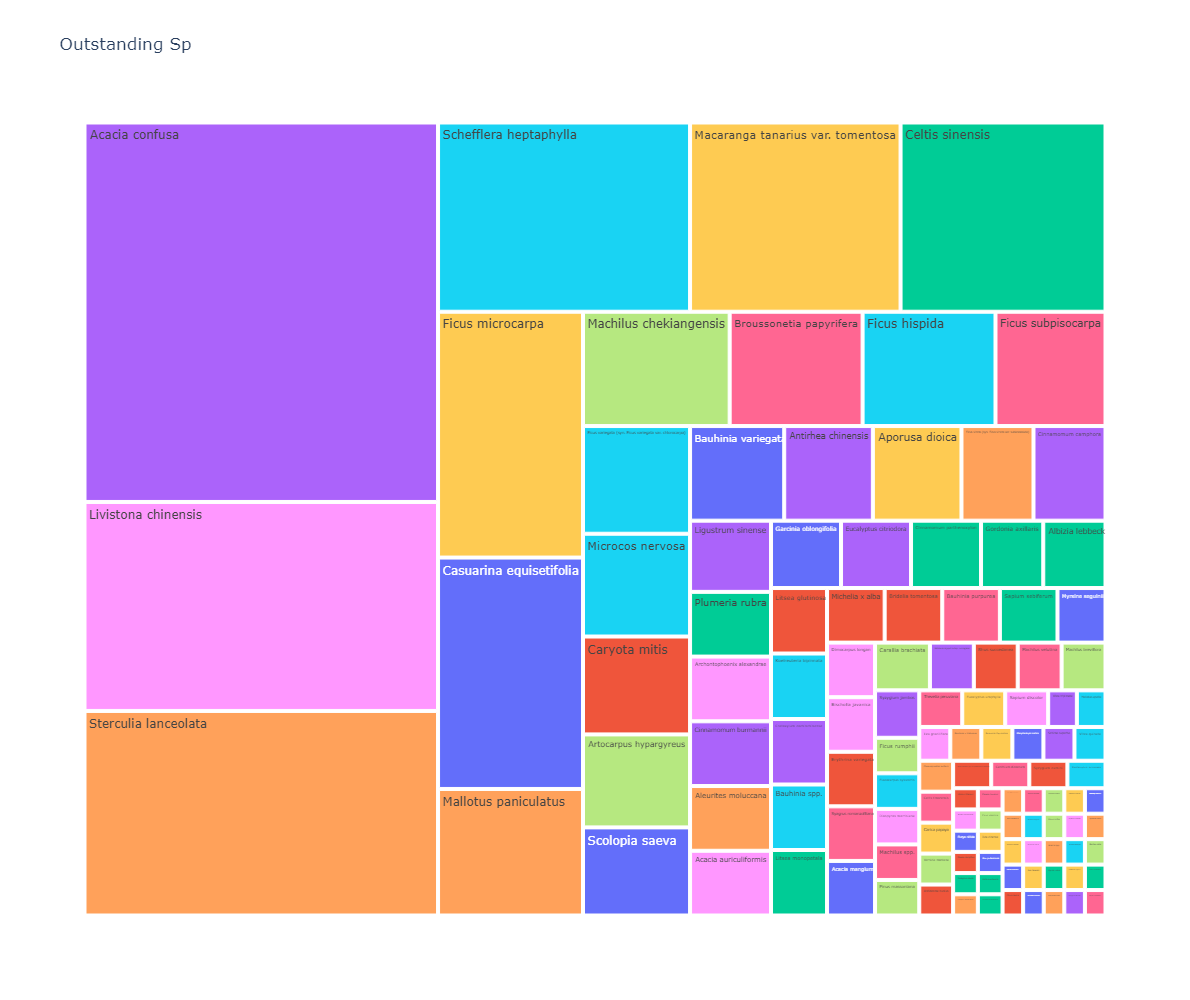

In [ ]:
Combar = px.treemap(dfexisting, color = 'Botanical_Name', values = 'Count', path = ['Botanical_Name'], height = 1000, title = 'Outstanding Sp')
Combar

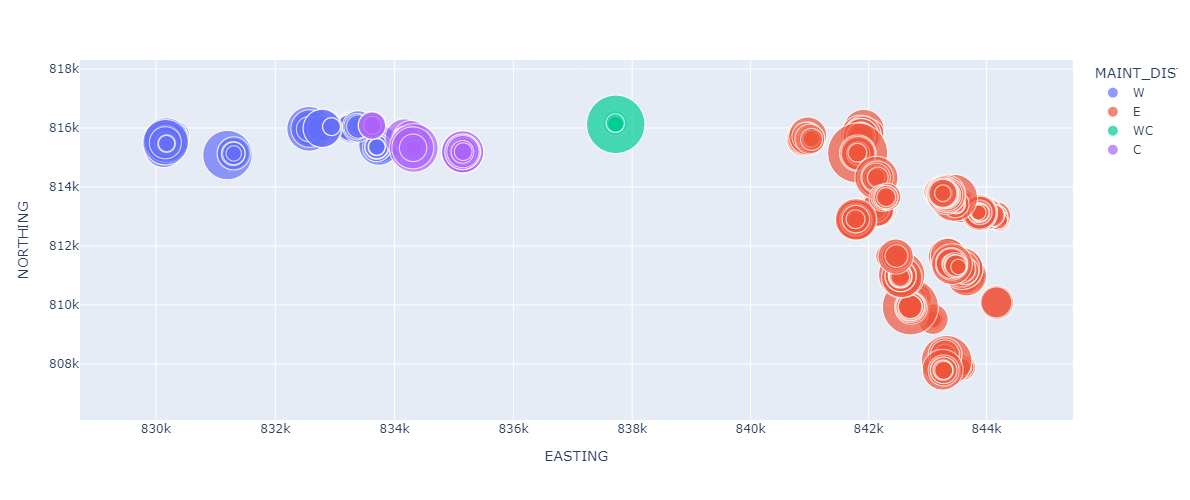

In [ ]:
# xy 分佈
import plotly.express as px

fig = px.scatter(dfmerge, y = 'NORTHING', x = 'EASTING', size = 'DBH', height =500, color = 'MAINT_DIST' , hover_name = 'MAINT_DIST', log_x = True,size_max=60)
fig.show()

In [ ]:
dfexisting

TREE_ID INV_GID       TREE_UID          VEG_ID TAG_ID FEAT_TYPE  \
0     RTR0028811   79303   TR28811R2213   11SW-A/C307_2   None         0   
2     RTR0028815   74967   TR28815R2213   11SW-A/C309_0   None         0   
3     RTR0028821   74968   TR28821R2213   11SW-A/C309_0   None         0   
4     RTR0028822   74969   TR28822R2213   11SW-A/C309_0   None         0   
5     RTR0028823   74970   TR28823R2213   11SW-A/C309_0   None         0   
...          ...     ...            ...             ...    ...       ...   
1966  ETR0680064  500052  TR680064E1820  15NE-B/FR162_0    NaN         0   
1967  ETR0680061  500049  TR680061E1820  15NE-B/FR162_0    NaN         0   
1968  RTR0016581   43746   TR16581R2213   15NE-B/R323_0    NaN         0   
1969  ETR0680070  500058  TR680070E1820   15NE-B/R323_0    NaN         0   
1972  ETR0680071  500059  TR680071E1820   15NE-B/R323_0    NaN         0   

     ZONE_TYPE  SPEC_TYPE DEFECT_TYPE OVT_ID  ...        EASTING  \
0            1        169        None   None  ...  831197.784981   
2            1        446        None   None  ...  831303.097000   
3            1        492        None   None  ...  831295.849000   
4            1        446        None   None  ...  831301.029000   
5            1        618        None   None  ...  831294.628000   
...        ...        ...         ...    ...  ...            ...   
1966         1        307         NaN    NaN  ...  843405.000000   
1967         1        307         NaN    NaN  ...  843410.000000   
1968         1        170         NaN    NaN  ...  843466.879000   
1969         1        618         NaN    NaN  ...  843456.180000   
1972         1         86         NaN    NaN  ...  843524.000000   

           NORTHING            Fld  Year  Month Year_Month  \
0     815081.233741  Consolidation  2022     12    2022_12   
2     815137.172000  Consolidation  2022     12    2022_12   
3     815132.888000  Consolidation  2022     12    2022_12   
4     815135.571000  Consolidation  2022     12    2022_12   
5     815132.135000  Consolidation  2022     12    2022_12   
...             ...            ...   ...    ...        ...   
1966  811390.000000         Result  2022      6     2022_6   
1967  811391.000000         Result  2022      6     2022_6   
1968  811343.299000         Result  2022      6     2022_6   
1969  811354.260000         Result  2022      6     2022_6   
1972  811287.000000         Result  2022      6     2022_6   

                         Botanical_Name Chinese_Name  \
0                   Cinnamomum camphora            樟   
2     Macaranga tanarius var. tomentosa           血桐   
3                      Microcos nervosa     破布葉(布渣葉)   
4     Macaranga tanarius var. tomentosa           血桐   
5                Schefflera heptaphylla     鵝掌柴(鴨腳木)   
...                                 ...          ...   
1966                      Ficus hispida     對葉榕(牛乳樹)   
1967                      Ficus hispida     對葉榕(牛乳樹)   
1968           Cinnamomum parthenoxylon           黃樟   
1969             Schefflera heptaphylla     鵝掌柴(鴨腳木)   
1972                 Bischofia javanica           秋楓   

                             Combined_Name Count  
0                    Cinnamomum camphora 樟     1  
2     Macaranga tanarius var. tomentosa 血桐     1  
3                Microcos nervosa 破布葉(布渣葉)     1  
4     Macaranga tanarius var. tomentosa 血桐     1  
5          Schefflera heptaphylla 鵝掌柴(鴨腳木)     1  
...                                    ...   ...  
1966                Ficus hispida 對葉榕(牛乳樹)     1  
1967                Ficus hispida 對葉榕(牛乳樹)     1  
1968           Cinnamomum parthenoxylon 黃樟     1  
1969       Schefflera heptaphylla 鵝掌柴(鴨腳木)     1  
1972                 Bischofia javanica 秋楓     1  

[1545 rows x 39 columns]

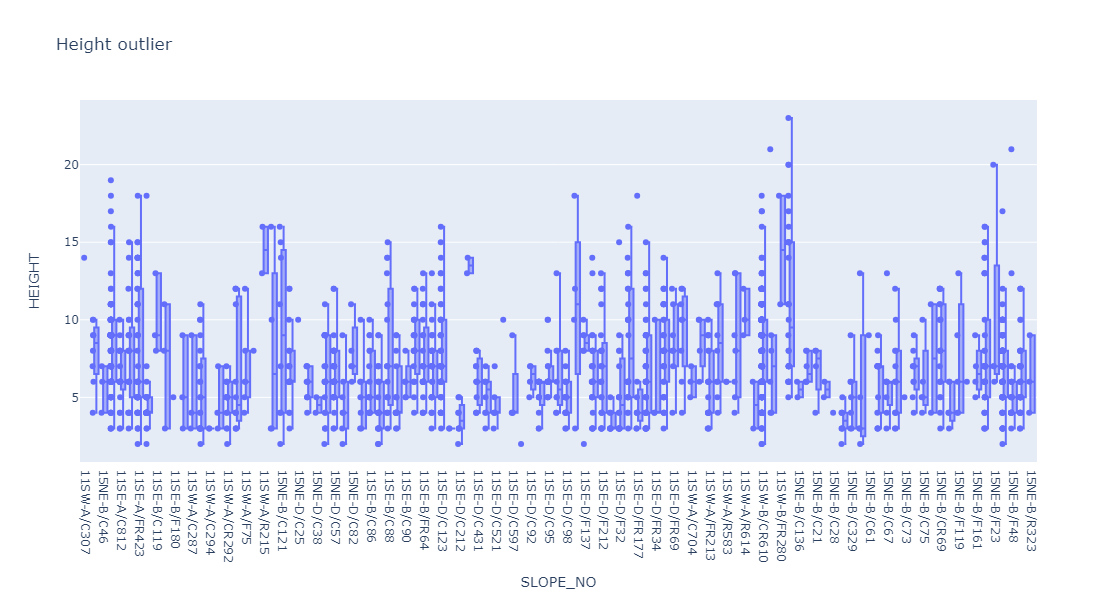

In [ ]:
import plotly.express as px
fig = px.box(dfexisting, x="SLOPE_NO", y="HEIGHT", points="all", height = 600, width = 2100,  title="Height outlier", hover_data=["TREE_ID"])
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3985325334.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



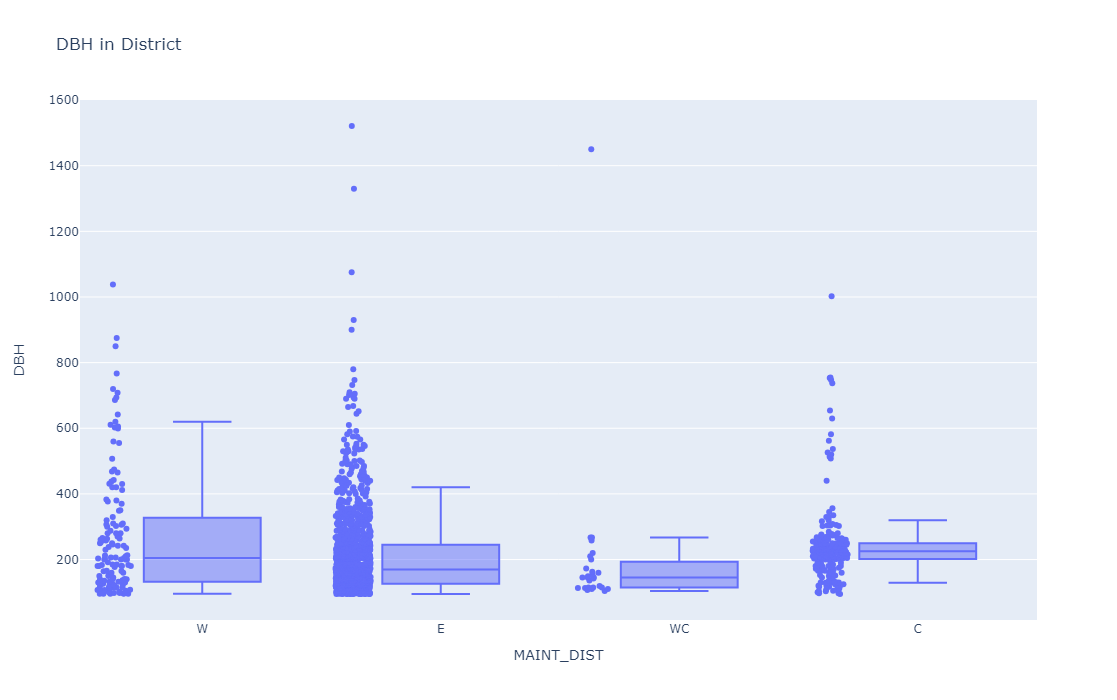

In [ ]:
import plotly.express as px

cond1 = dfmerge['DBH'].notnull()
fig = px.box(dfexisting[cond1], x='MAINT_DIST', y="DBH", points="all", height = 700, title='DBH in District', hover_data=["TREE_ID"])
fig.show()

In [ ]:
#xlwing
sheet = xw.Book().sheets[0]
sheet.range("A1").value =  dfmerge

In [ ]:
dfexisting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1972
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TREE_ID         1545 non-null   object        
 1   INV_GID         1545 non-null   object        
 2   TREE_UID        1545 non-null   object        
 3   VEG_ID          1545 non-null   object        
 4   TAG_ID          0 non-null      object        
 5   FEAT_TYPE       1545 non-null   object        
 6   ZONE_TYPE       1545 non-null   object        
 7   SPEC_TYPE       1545 non-null   int64         
 8   DEFECT_TYPE     0 non-null      object        
 9   OVT_ID          0 non-null      object        
 10  TR_LEVEL        1545 non-null   float64       
 11  ROOT_LEVEL      1545 non-null   object        
 12  HEIGHT          1545 non-null   int64         
 13  SPREAD          1545 non-null   int64         
 14  DBH             1545 non-null   int64         
 15  RECO

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dfsp = dfexisting[['Botanical_Name','SPREAD','HEIGHT','DBH', 'MAINT_DIST']]
dfsp['Factorize_Dist'] = pd.factorize(dfsp.MAINT_DIST)[0]
sns.pairplot(dfsp, hue='MAINT_DIST', height = 6)
plt.show()

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\999539102.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\4040816484.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



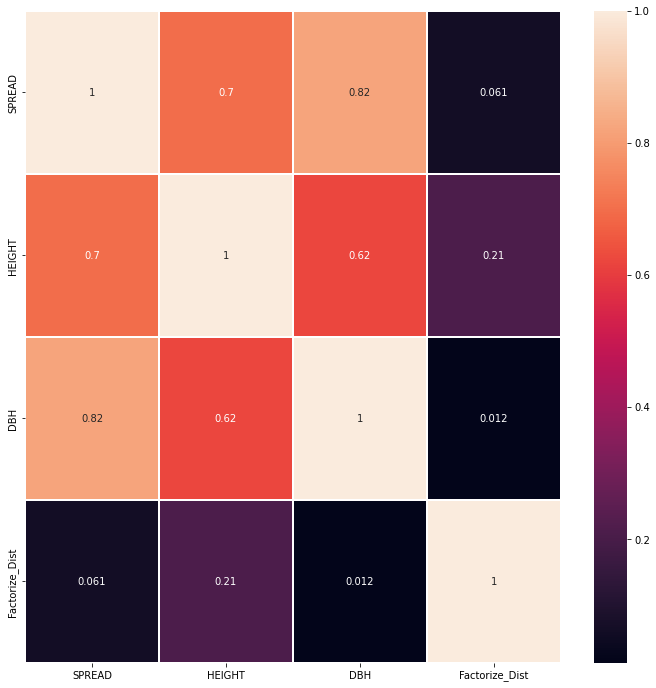

In [ ]:
#specific fig size
fig, ax=plt.subplots(figsize = (12,12))

sns.heatmap(dfsp.corr(), annot=True, linewidth =0.3)
plt.show()

Botanical_Name  SPREAD  HEIGHT   DBH MAINT_DIST  \
0                   Cinnamomum camphora      13      14  1038          W   
2     Macaranga tanarius var. tomentosa       5       7   259          W   
3                      Microcos nervosa       8       6   238          W   
4     Macaranga tanarius var. tomentosa       8       9   258          W   
5                Schefflera heptaphylla       8      10   420          W   
...                                 ...     ...     ...   ...        ...   
1966                      Ficus hispida       2       4   106          E   
1967                      Ficus hispida       2       5   116          E   
1968           Cinnamomum parthenoxylon       6       9   270          E   
1969             Schefflera heptaphylla       4       6   175          E   
1972                 Bischofia javanica       4       4    98          E   

      Factorize_Dist  
0                  0  
2                  0  
3                  0  
4                  0  
5                  0  
...              ...  
1966               1  
1967               1  
1968               1  
1969               1  
1972               1  

[1545 rows x 6 columns]

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



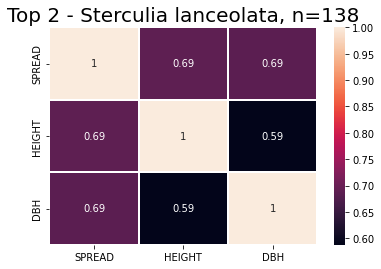

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



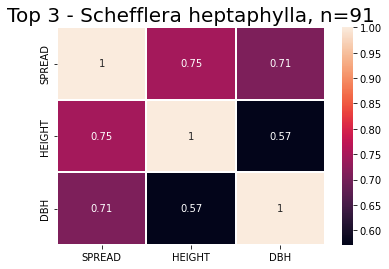

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



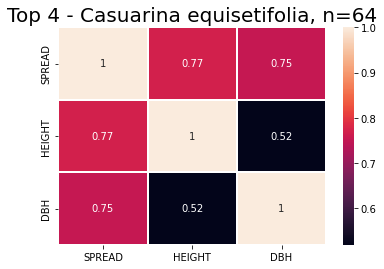

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



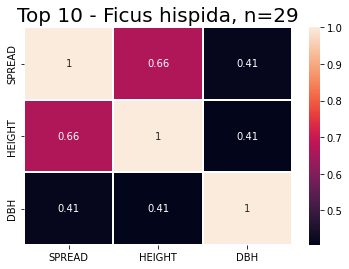

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



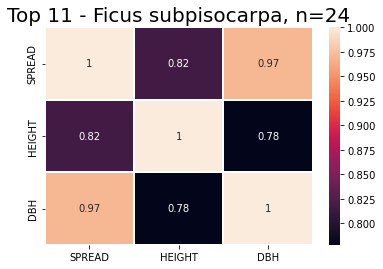

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



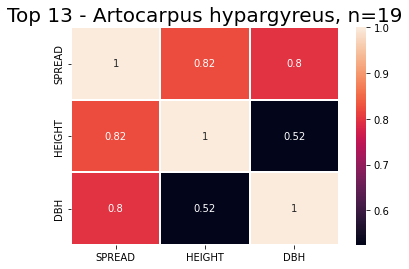

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



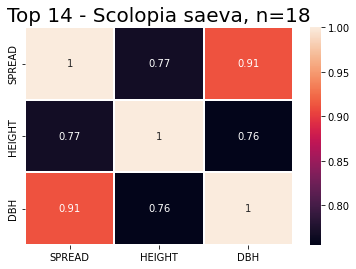

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



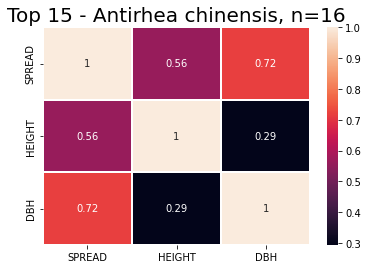

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



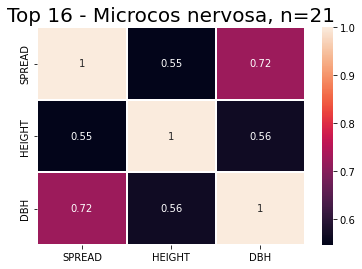

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



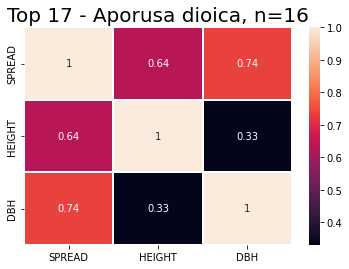

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



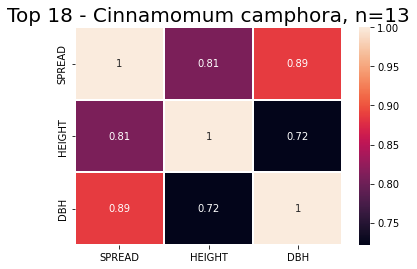

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



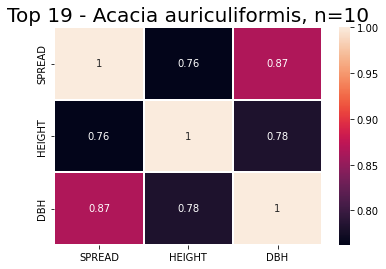

C:\Users\ckho\AppData\Local\Temp\ipykernel_13220\3827418576.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



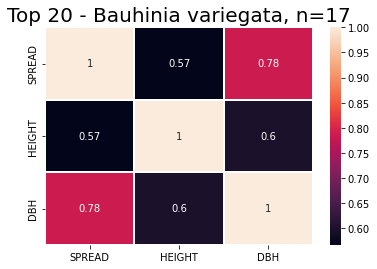

In [ ]:
x = 20

top = dfexisting[dfexisting.MAINT_DIST=='E']['Botanical_Name'].value_counts()[:x].reset_index().rename(columns={'index':'Species'})

count = 0
for i in top['Species']:
    count = count + 1
    table = dfexisting[dfexisting.Botanical_Name == i][['Botanical_Name','SPREAD','HEIGHT','DBH', 'MAINT_DIST']]
    sns.heatmap(table.corr(), annot=True, linewidth =0.3)
    plt.title("Top " + str(count) + " - " + i + ", n="+  str(table.shape[0]), fontsize =20)
    plt.show()